In [2]:
import pandas as pd

## Methods for hyperparameter tuning
- grid search (brute force approach): it considers all the combinations of hyperparameters and returns the best set

- randomized grid search: it randomly selects a combination of hyperparameters and returns the best set

- halving grid search

## Grid Search

In [3]:
# load pima dataset
diabetes = pd.read_csv('../Data/pima.csv')
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# feature matrix x, target vector y
X = diabetes.drop('label', axis=1)
y = diabetes['label']

In [5]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [7]:
# import the grid search module
from sklearn.model_selection import GridSearchCV

In [44]:
# define a grid dictionary of hyperparameter values
param_dict = {'n_neighbors': list(range(1,50))}

In [9]:
# the grid search
grid = GridSearchCV(knn, param_dict, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
# scoring: evaluation metric, accuracy, recall, precision, f1, roc_auc, etc.
# cv: number of folds in cross-validation
# n_jobs: number of cores to use, -1 means all cores
# verbose: print progress (levels 0-3)

In [10]:
# fit the grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             scoring='accuracy', verbose=1)

<AxesSubplot:>

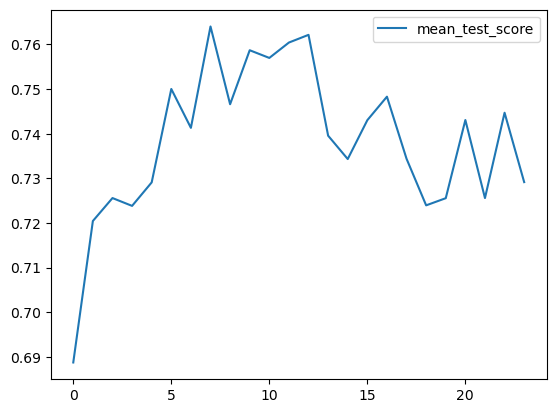

In [11]:
# grid search results
grid_results = pd.DataFrame(grid.cv_results_)
grid_results[['mean_test_score', 'params']].plot()

In [12]:
# best hyperparameter values
grid.best_params_

{'n_neighbors': 8}

In [13]:
# best score
grid.best_score_

0.7640350877192982

In [14]:
# best classifier
knn_best = grid.best_estimator_

In [15]:
# test the best classifier
y_pred = knn_best.predict(X_test)

# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7083333333333334

#### Searching over multiple hyperparameters simultaneously

- KNN has a `weights` hyperparameter

    - can be `uniform` (uniform weights) or `distance` (weight points by the inverse of their distance)
    - uniform weights is the default, it just takes the average of the neighbors
    - distance weights takes the weighted average of the neighbors, where closer neighbors of a query point will have a greater influence than neighbors which are further away

In [53]:
# parameter grid
param_grid = {'n_neighbors': list(range(1,25)),
              'weights': ['uniform', 'distance']}

In [17]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# best hyperparameter values
print(grid.best_params_)

# best score
print(grid.best_score_)

# best classifier
knn_best = grid.best_estimator_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


{'n_neighbors': 13, 'weights': 'distance'}
0.7655474894131882


In [18]:
# test the best classifier
y_pred = knn_best.predict(X_test)

# accuracy
accuracy_score(y_test, y_pred)

0.71875

## Randomized Grid Search

In [19]:
# import the random search module
from sklearn.model_selection import RandomizedSearchCV

In [20]:
randomized_grid = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1, n_iter=20, verbose=1)
# fit the random search
randomized_grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=1)

<AxesSubplot:>

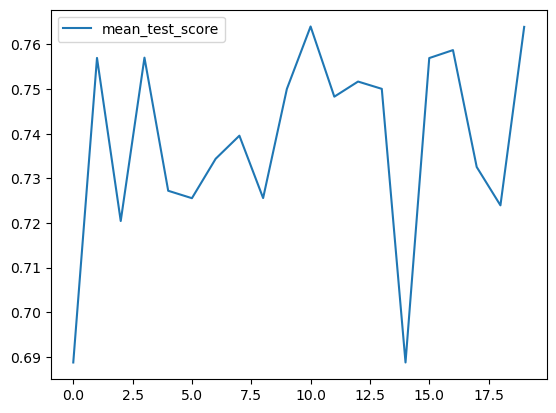

In [21]:
randomized_grid_results = pd.DataFrame(randomized_grid.cv_results_)
randomized_grid_results[['mean_test_score', 'params']].plot()

In [22]:
# best hyperparameter values
print(randomized_grid.best_params_)

# best score
print(randomized_grid.best_score_)

# best classifier
knn_best = randomized_grid.best_estimator_

{'weights': 'uniform', 'n_neighbors': 8}
0.7640350877192982


## Successive Halving

- Takes a small random subset of the dataset and tests the full set of hyperparameters on that subset
- Eliminates the worst half of the hyperparameter combinations
- Repeats the process with a larger subset of the data
- Continues until only one hyperparameter combination remains
- Faster than grid search, but expirimental

In [23]:
# import successive halving
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [49]:
grid = HalvingGridSearchCV(knn, param_grid, cv=10, factor=2, scoring='accuracy', n_jobs=-1, verbose=1)
# parameters: knn = estimator, param_grid = grid dictionary, cv = number of folds, 
# factor = reduction factor (2 means 50% reduction in each iteration), scoring = evaluation metric, n_jobs = number of cores to use, verbose = print progress

In [50]:
# fit the grid search
grid.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 7
n_possible_iterations: 4
min_resources_: 40
max_resources_: 576
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 98
n_resources: 40
Fitting 10 folds for each of 98 candidates, totalling 980 fits


/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/jake/miniconda3/envs/sportsenv/li

----------
iter: 1
n_candidates: 49
n_resources: 80
Fitting 10 folds for each of 49 candidates, totalling 490 fits


/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [0.65833333 0.65833333 0.725      0.65833333 0.70833333 0.73333333
 0.80833333 0.73333333 0.78333333 0.75833333 0.74166667 0.725
 0.74166667 0.71666667 0.74166667 0.71666667 0.775      0.75
 0.75       0.775      0.75       0.725      0.66666667 0.725
 0.675      0.725      0.63333333 0.66666667 0.60833333 0.66666667
 0.63333333 0.66666667 0.63333333 0.71666667 0.65833333 0.66666667
 0.65833333 0.68333333 0.65833333 0.71666667 0.65833333 0.68333333
 0.65833333 0.71666667 0.68333333 0.71666667 0.68333333 0.71666667
 0.68333333 0.68333333 0.68333333 0.71666667 0.68333333 0.70833333
 0.68333333 0.70833333 0.68333333 0.70833333 0.68333333 0.70833333
 0.68333333 0.70833333 0.68333333 0.70833333 0.70833333 0.70833333
 0.65833333 0.70833333 0.65833333 0.70833333        nan        nan
        nan        nan        nan        nan  

----------
iter: 2
n_candidates: 25
n_resources: 160
Fitting 10 folds for each of 25 candidates, totalling 250 fits


/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [0.65833333 0.65833333 0.725      0.65833333 0.70833333 0.73333333
 0.80833333 0.73333333 0.78333333 0.75833333 0.74166667 0.725
 0.74166667 0.71666667 0.74166667 0.71666667 0.775      0.75
 0.75       0.775      0.75       0.725      0.66666667 0.725
 0.675      0.725      0.63333333 0.66666667 0.60833333 0.66666667
 0.63333333 0.66666667 0.63333333 0.71666667 0.65833333 0.66666667
 0.65833333 0.68333333 0.65833333 0.71666667 0.65833333 0.68333333
 0.65833333 0.71666667 0.68333333 0.71666667 0.68333333 0.71666667
 0.68333333 0.68333333 0.68333333 0.71666667 0.68333333 0.70833333
 0.68333333 0.70833333 0.68333333 0.70833333 0.68333333 0.70833333
 0.68333333 0.70833333 0.68333333 0.70833333 0.70833333 0.70833333
 0.65833333 0.70833333 0.65833333 0.70833333        nan        nan
        nan        nan        nan        nan  

----------
iter: 3
n_candidates: 13
n_resources: 320
Fitting 10 folds for each of 13 candidates, totalling 130 fits


/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [0.65833333 0.65833333 0.725      0.65833333 0.70833333 0.73333333
 0.80833333 0.73333333 0.78333333 0.75833333 0.74166667 0.725
 0.74166667 0.71666667 0.74166667 0.71666667 0.775      0.75
 0.75       0.775      0.75       0.725      0.66666667 0.725
 0.675      0.725      0.63333333 0.66666667 0.60833333 0.66666667
 0.63333333 0.66666667 0.63333333 0.71666667 0.65833333 0.66666667
 0.65833333 0.68333333 0.65833333 0.71666667 0.65833333 0.68333333
 0.65833333 0.71666667 0.68333333 0.71666667 0.68333333 0.71666667
 0.68333333 0.68333333 0.68333333 0.71666667 0.68333333 0.70833333
 0.68333333 0.70833333 0.68333333 0.70833333 0.68333333 0.70833333
 0.68333333 0.70833333 0.68333333 0.70833333 0.70833333 0.70833333
 0.65833333 0.70833333 0.65833333 0.70833333        nan        nan
        nan        nan        nan        nan  

HalvingGridSearchCV(cv=10, estimator=KNeighborsClassifier(), factor=2,
                    n_jobs=-1,
                    param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20, 21, 22, 23, 24, 25, 26,
                                                27, 28, 29, 30, ...],
                                'weights': ['uniform', 'distance']},
                    scoring='accuracy', verbose=1)

In [ ]:
# set max rows displayed in pandas
pd.set_option('display.max_rows', 1000)

In [52]:
grid_halving_results = pd.DataFrame(grid.cv_results_)
grid_halving_results.loc[grid_halving_results.mean_test_score.isna(), ['mean_test_score', 'params']] 

,mean_test_score,params
70,NaN,"{'n_neighbors': 36, 'weights': 'uniform'}"
71,NaN,"{'n_neighbors': 36, 'weights': 'distance'}"
72,NaN,"{'n_neighbors': 37, 'weights': 'uniform'}"
73,NaN,"{'n_neighbors': 37, 'weights': 'distance'}"
74,NaN,"{'n_neighbors': 38, 'weights': 'uniform'}"
75,NaN,"{'n_neighbors': 38, 'weights': 'distance'}"
76,NaN,"{'n_neighbors': 39, 'weights': 'uniform'}"
77,NaN,"{'n_neighbors': 39, 'weights': 'distance'}"
78,NaN,"{'n_neighbors': 40, 'weights': 'uniform'}"
79,NaN,"{'n_neighbors': 40, 'weights': 'distance'}"


In [51]:
grid_halving_results.isna().sum()

iter                  0
n_resources           0
mean_fit_time         0
std_fit_time          0
mean_score_time       0
std_score_time        0
param_n_neighbors     0
param_weights         0
params                0
split0_test_score     0
split1_test_score     0
split2_test_score     0
split3_test_score     0
split4_test_score     0
split5_test_score     0
split6_test_score     0
split7_test_score     0
split8_test_score     0
split9_test_score     0
mean_test_score       0
std_test_score        0
rank_test_score       0
split0_train_score    0
split1_train_score    0
split2_train_score    0
split3_train_score    0
split4_train_score    0
split5_train_score    0
split6_train_score    0
split7_train_score    0
split8_train_score    0
split9_train_score    0
mean_train_score      0
std_train_score       0
dtype: int64